<a href="https://colab.research.google.com/github/alfnpnd/DataAnalysis-ML/blob/main/Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **Find Shape of the Dataset**

In [ ]:
df.shape

(1338, 7)

## **Get Information of the Dataset**

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## **Check Missing Values in the Dataset**

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


## **Convert Categorical Values to Numerical Values**

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df['sex'] = df['sex'].map({'female':0,'male':1})

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [ ]:
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df['region'] = df['region'].map({'southwest':1,'southeast':2,
                                 'northwest':3,'northeast':4})


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


## **Store Feature in X and Target in y**

In [ ]:
X = df.drop(['charges'], axis = 1)
y = df['charges']

In [ ]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3


In [ ]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


## **Train/Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,0,3
1285,47,0,24.320,0,0,4
1142,52,0,24.860,0,0,2
969,39,0,34.320,5,0,2
486,54,0,21.470,3,0,3
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,4
1130,39,0,23.870,5,0,2
1294,58,1,25.175,0,0,4
860,37,0,47.600,2,1,1


## **Import Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


## **Train Model**

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
svm = SVR()
svm.fit(X_train, y_train)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

## **Prediction on Test Data**

In [ ]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gb.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'LR':y_pred1,'SVM':y_pred2,'RF':y_pred3,
                    'GB':y_pred4})
df1

,Actual,LR,SVM,RF,GB
764,9095.06825,8924.407244,9548.261584,10877.112757,11001.128629
887,5272.17580,7116.295018,9492.515425,5390.951748,5840.174656
890,29330.98315,36909.013521,9648.758701,28487.552829,28001.980112
1293,9301.89355,9507.874691,9555.044136,10502.151812,9745.291602
259,33750.29180,27013.350008,9420.421978,34716.847066,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47165.865405,45431.423211
575,12222.89830,11814.555568,9625.431547,12425.746757,12465.025294
535,6067.12675,7638.107736,9504.168517,6420.173992,6974.336525
543,63770.42801,40959.081722,9605.004594,46747.801907,47862.047791


In [ ]:
df1

,Actual,LR,SVM,RF,GB
764,9095.06825,8924.407244,9548.261584,10877.112757,11001.128629
887,5272.17580,7116.295018,9492.515425,5390.951748,5840.174656
890,29330.98315,36909.013521,9648.758701,28487.552829,28001.980112
1293,9301.89355,9507.874691,9555.044136,10502.151812,9745.291602
259,33750.29180,27013.350008,9420.421978,34716.847066,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47165.865405,45431.423211
575,12222.89830,11814.555568,9625.431547,12425.746757,12465.025294
535,6067.12675,7638.107736,9504.168517,6420.173992,6974.336525
543,63770.42801,40959.081722,9605.004594,46747.801907,47862.047791


## **Compare Performance**

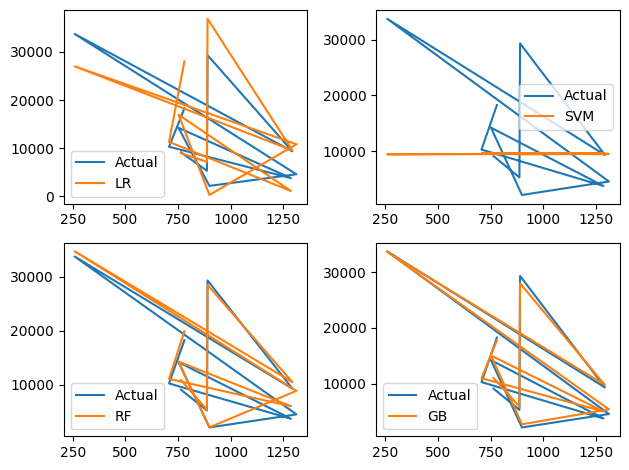

In [ ]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['LR'].iloc[0:11], label = 'LR')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['SVM'].iloc[0:11], label = 'SVM')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['RF'].iloc[0:11], label = 'RF')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['GB'].iloc[0:11], label = 'GB')

plt.tight_layout()
plt.legend()
plt.show()

## **Evaluating the Model**

In [ ]:
score1 = metrics.r2_score(y_test, y_pred1)*100
score2 = metrics.r2_score(y_test, y_pred2)*100
score3 = metrics.r2_score(y_test, y_pred3)*100
score4 = metrics.r2_score(y_test, y_pred4)*100
print('Linear Regression = ',score1,
      'SVM = ',score2,
      'Random Forest = ',score3,
      'GradientBoosting = ',score4)

Linear Regression =  78.33463107364538 SVM =  -7.2297627878618265 Random Forest =  86.65015688660233 GradientBoosting =  87.79936181637191


In [ ]:
s1 = metrics.mean_squared_error(y_test, y_pred1)
s2 = metrics.mean_squared_error(y_test, y_pred2)
s3 = metrics.mean_squared_error(y_test, y_pred3)
s4 = metrics.mean_squared_error(y_test, y_pred4)
print('Linear Regression = ',s1,
      'SVM = ',s2,
      'Random Forest = ',s3,
      'GradientBoosting = ',s4)

Linear Regression =  33635210.431178406 SVM =  166472846.50979328 Random Forest =  20725462.089691754 GradientBoosting =  18941336.013983563


In [ ]:
pred = gb.predict([[40,1,40.30,4,1,2]])
print(pred)

[44757.24853851]


## **Saving Model**

In [ ]:
import joblib

joblib.dump(gb,'health_model')


['health_model']

In [ ]:
model = joblib.load('health_model')

In [ ]:
pred = model.predict([[25,1,50.5,0,0,2]])
print(pred)

[3053.92765207]
